In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.19.5
1.3.4
2.6.0


In [3]:
X = np.array([
    -7., -4., -1., 2., 5., 8., 11., 14.
])

y = np.array([
    3., 6., 9., 12., 15., 18., 21., 24.
])

print(X, X.shape)
print(y, y.shape)

[-7. -4. -1.  2.  5.  8. 11. 14.] (8,)
[ 3.  6.  9. 12. 15. 18. 21. 24.] (8,)


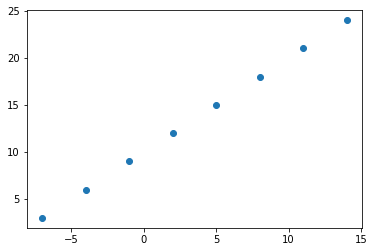

In [4]:
# 산점도! 
plt.scatter(X, y)

In [5]:
# BA : Business Analytics    / 현재 business 상황을 파악하는 수준
# BI : Business Intelligence / 현재 business 상황은 파악이 되었고, 이를 바탕으로 사업을 위해 예측

In [6]:
house_info = tf.constant(["bedroom", "bathrom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathrom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [7]:
house_info.shape

TensorShape([3])

In [8]:
X = tf.constant([
    -7., -4., -1., 2., 5., 8., 11., 14.
])

y = tf.constant([
    3., 6., 9., 12., 15., 18., 21., 24.
])

print(X, X.shape)
print(y, y.shape)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) (8,)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32) (8,)


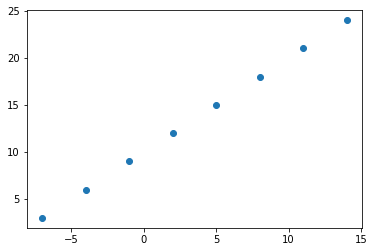

In [9]:
plt.scatter(X, y)

In [10]:
input_shape = X[0].shape

output_shape = y[0].shape

print(X[0], y[0])
print(input_shape, output_shape)

tf.Tensor(-7.0, shape=(), dtype=float32) tf.Tensor(3.0, shape=(), dtype=float32)
() ()


In [11]:
# tensorflow 1.X vs. tensorflow 2.X
# 
# Tensorflow 2.X에서 머신러닝이나 딥러닝을 한다...
# Keras를 사용하게 된다.
# 
# Tensorflow를 가지고 머신러닝이나 딥러닝을 하는 방법
# 1. Sequential (난이도 하)
# 2. Functional (난이도 중)
# 3. Subclass (난이도 상)

In [12]:
# Tensorflow로 머신러닝이나 딥러닝을 한다.
# 1. 데이터 준비
# 2. 모델 생성 (create) : 신경망을 구성하는 레이어 (층)들을 직접 구성 / 전이학습에서 사용할 이전의 모델을 가져온다
# 3. 모델을 컴파일 (compile) : 모델 성능(performance)을 어떻게 측정 (loss/metrics)할지 그리고 학습을 어떻게 개선할지 (optimizer)
# 4. 모델을 학습시킨다 (fit) : 모델이 데이터있는 패턴을 찾을 수 있도록 합니다.

In [13]:
# batch size : 데이터셋이 존재할 경우, 1번에 다 학습시키면, 메모리 부족현상 발생할 수도 있고, 효율성이 부족하다
#               전체 데이터에서 학습할 때마다 얼만큼 가져올 것인지 ex) 데이터가 100개 batch size 10으로 / 10번 쪼개서 학습
# epoch : 데이터셋이 있을 때, 이 데이터셋을 몇 번 학습시킬 것인지 지정 / 똑같은 문제집을 몇 번 볼거냐...
# 1epoch에서 10번으로 나누어서 학습을 한다.


In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 999us/step - loss: 10.9748 - mae: 10.9748


In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# 우리가 지금 모델을 만든 이유! ===> 예측 (predict) 을 하고 싶다!
model.predict(
    [17.]
)

array([[12.716021]], dtype=float32)

In [17]:
# 모델을 개선하기 위해...
# 1. 데이터를 많이 준비 (더 많은 것으로 학습을 한다)
# 2. 모델 생성시 레이어를 더 추가하거나, 각 레이어에 포함되는 뉴런을 추가, 활성화 함수를 변경
# 3. 모델 컴파일시 optimization 함수를 변경하거나 learning rate를 수정
# 4. 모델 학습시 epoch를 늘려준다 (더 오래 학습한다)

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 145ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 1000us/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s

In [19]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
model.predict(
    [17.0]
)

array([[30.158512]], dtype=float32)

In [21]:
# MLOps, AIOps, DataOps
# 모델을 생성 -> 이 모델을 평가 -> 모델을 개선해서 다시 생성 -> 이 모델을 평가 -> 모델을 개선해서 다시 생성 -> 이 모델을 평가 -> ....

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [24]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [25]:
# y = X + 10
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [26]:
# 데이터들을 나누기
# Traning set : 이 데이터로 모델은 학습을 한다. 전체 데이터셋에서 70 ~ 80%
# Validation set (optional) : 학습을 할 때 잘하고 있는지 확인하는 데이터 / 수능 모의고사
# Test set : 학습한 모델을 test하기 위한 데이터, validation set이 없다하면 20 ~ 30% / 수능

In [27]:
len(X)

50

In [28]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [29]:
# 시각화, 시각화, 시각화!

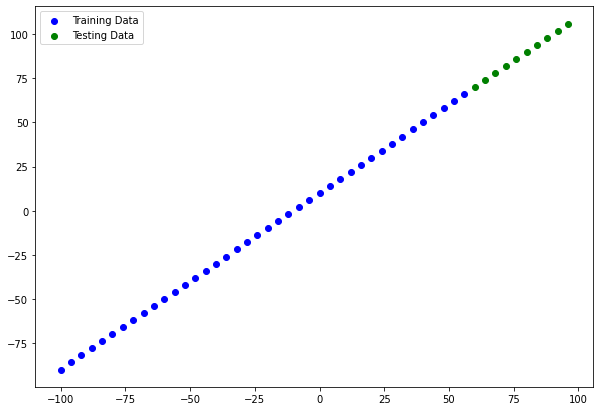

In [30]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = "b", label = "Training Data")
plt.scatter(X_test, y_test, c = "g", label = "Testing Data")

plt.legend()

In [31]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

# model.fit(X, y, epochs = 100)

In [32]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Total params: 모델에 존재하는 파라미터의 총갯수
# Trainable params: 학습을 하면서 모델이 최신화하는 파라미터의 갯수
# Non-trainable params: Trainable param의 반대 개념

In [36]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
!pip install keras-utils

You should consider upgrading via the 'd:\git\study\tensorflow_nlp\tensorflow_nlp\scripts\python.exe -m pip install --upgrade pip' command.


In [39]:
from tensorflow.keras.utils import plot_model

In [40]:
!pip install pydot graphviz

You should consider upgrading via the 'd:\git\study\tensorflow_nlp\tensorflow_nlp\scripts\python.exe -m pip install --upgrade pip' command.


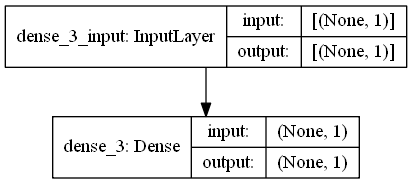

In [41]:
plot_model(model, show_shapes = True)

In [44]:
y_preds = model.predict(X_test)

In [45]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [46]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels=y_test, predictions = y_preds):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Traning data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

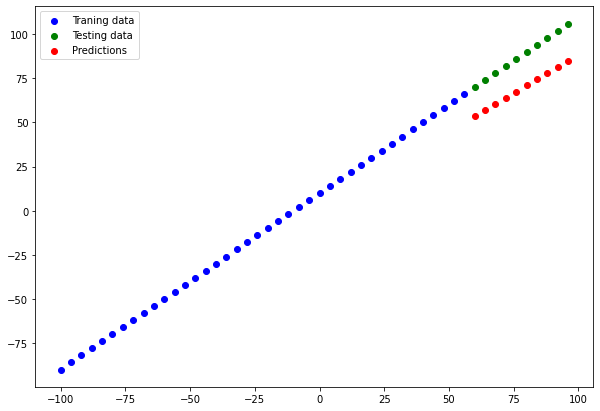

In [47]:
plot_predictions(
    train_data = X_train, 
    train_labels = y_train, 
    test_data = X_test, 
    test_labels=y_test, 
    predictions = y_preds
)

In [26]:
# regression 문제에서는 일반적으로 2개 종류의 metrics을 사용
# MAE (Mean Absolute Error) : 실제 값과 예측값의 차이의 평균
# MSE (Mean Squared Error) : 실제 값과 예측값의 차이의 제곱의 평균

# 이 MAE든 MSE든 중요한 것은 이 값들이 낮아야 좋다!

In [48]:
# 영어 단어로 이야기를 한다...
# evaluate()!
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 73ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [49]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

In [50]:
y_test, type(y_test), y_test.shape

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 numpy.ndarray,
 (10,))

In [51]:
y_preds, type(y_preds), y_preds.shape

(array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32),
 numpy.ndarray,
 (10, 1))

In [53]:
y_preds.squeeze().shape

(10,)

In [54]:
y_test.dtype

dtype('int32')

In [55]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [56]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [57]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [58]:
tf.reduce_mean( tf.abs( y_test-y_preds.squeeze() ) )

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

In [59]:
def mae(y_test, y_preds):
    return tf.metrics.mean_absolute_error(y_test, y_preds)

def mse(y_test, y_preds):
    return tf.metrics.mean_squared_error(y_test, y_preds)

In [60]:
# 모델을 개선하기 위해...
# 1. 더 많은 데이터... 현실은 녹녹치가 않다... 데이터가 많다면 더 많은 패턴들을 찾을 수 있다!
# 2. 모델은 좀더 크고 정교하게 만든다!
# 3. 더 오래 학습을 시킨다.

In [61]:
# model_1 : 이전 모델과 같은데, 학습을 더 시킨다

In [62]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model_1.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_1.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 1000us/step - loss: 15.9024 - mae: 15.9024
Epoch 2/500
2/2 [==============================] - 0s 1000us/step - loss: 11.2837 - mae: 11.2837
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/500
2/2 [==============================] - 0s 999us/step - loss: 9.4303 - mae: 9.4303
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/500
2/2 [==============================] - 0s 999us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/500
2/2 [==============================] - 0s 999us/step - loss: 10.1142 - mae: 10.1142
Epoch 11/500
2/2 [==============================] - 0s 

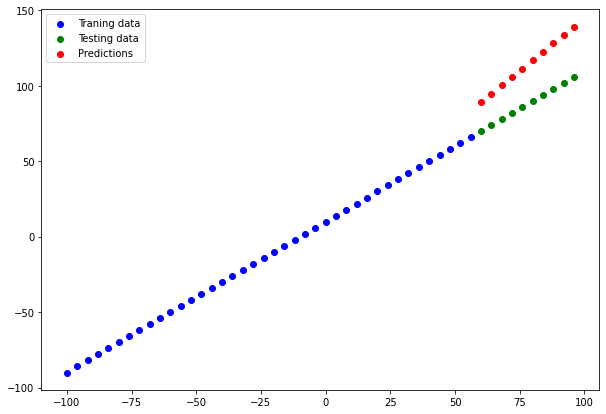

In [63]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [64]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(26.24289, 709.16064)

In [65]:
# model_2 : 레이어를 더 추가!

In [66]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 1000us/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 2ms/

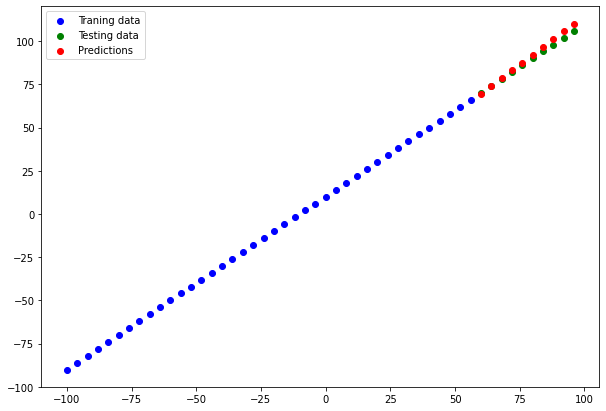

In [67]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [68]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

In [69]:
# model_3 : model_2과 같게 하고 epoch를 늘려본다

In [70]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_3.fit(X_train, y_train, epochs = 500, verbose = 0)

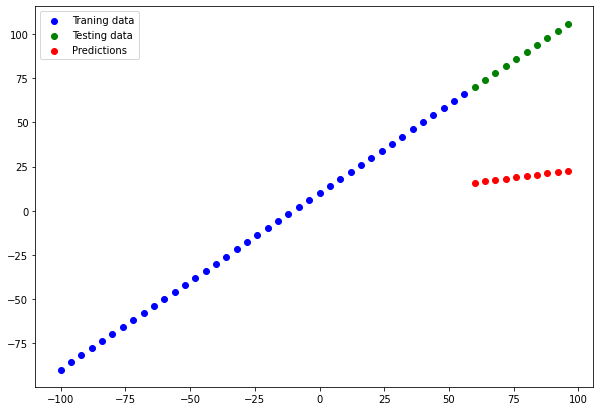

In [71]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [72]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

In [73]:
model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]
model_results, type(model_results)

([['model_1', 26.24289, 709.16064],
  ['model_2', 1.9097328, 5.45877],
  ['model_3', 68.68784, 4804.469]],
 list)

In [74]:
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,26.242889,709.160645
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


In [75]:
# DevOps : 개발 소스코드 -> 컴파일 -> 배포

In [76]:
# 모델을 저장을 해야한다! => 아무리 성능이 좋지 않은 모델이라도 저장을 하고 나중에 분석
# model.save()
# Tensorflow에서는 모델을 저장하는 2가지 방법이 존재
# 1. SavedModel Format (기본)
# 2. HDF5 format
# 위 2가지 방법의 주요 차이점 : SavedModel은 알아서 (automatically) 모델을 불러올 때 필요한 오브젝트 (레이러 등)를 불러옵니다.

In [77]:
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [78]:
model_2.save("best_model_SavedModel_format.h5")

In [79]:
# kernel을 재시작한 후...

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [81]:
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,26.242889,709.160645
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


In [82]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [83]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [84]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [85]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [86]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 1000us/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 999us/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 1000us/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0

In [87]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)

In [88]:
def mae(y_test, y_preds):
    return tf.metrics.mean_absolute_error(y_test, y_preds)

def mse(y_test, y_preds):
    return tf.metrics.mean_squared_error(y_test, y_preds)

In [89]:
mae(y_test, saved_model_preds.squeeze()).numpy()

1.9097328

In [90]:
mae(y_test, model_2_preds.squeeze()).numpy()

1.9097328

In [91]:
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [94]:
loaded_h5_model = tf.keras.models.load_model("best_model_SavedModel_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [95]:
h5_model_preds = loaded_h5_model.predict(X_test)

In [96]:
mae(y_test, h5_model_preds.squeeze()).numpy()

1.9097328

In [97]:
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [100]:
insurance = pd.read_csv("insurance.csv")
type(insurance), insurance.shape

(pandas.core.frame.DataFrame, (1338, 7))

In [101]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [103]:
# sex, smoker, region이라는 컬럼 데이터의 특징! Categorical 데이터다!
# Categorical data => Numerical data 변경이 필요하다!

In [104]:
insurance_one_hot = pd.get_dummies(insurance)

In [105]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [106]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [107]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [108]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [109]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [111]:
! pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.7.1-cp38-cp38-win_amd64.whl (33.7 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=3f2255b47c98d9eecc012606d143126d6c5569c0d71e9c36d09e2a86d9ba7254
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


You should consider upgrading via the 'd:\git\study\tensorflow_nlp\tensorflow_nlp\scripts\python.exe -m pip install --upgrade pip' command.


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,   # 20%
    random_state = 42
)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [115]:
# 지금까지 우리는
# 1. 데이터 불러오고
# 2. 데이터 살펴보고
# 3. 데이터를 분석하기 위해서 전처리하고,
# 4. 데이터를 모델에 학습시키기 위해 데이터셋을 나누어주었다!

In [116]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
    metrics = ["mae"]
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 424us/step - loss: 8868.5928 - mae: 8868.5928
Epoch 2/100
34/34 [==============================] - 0s 424us/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 424us/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 424us/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 424us/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 424us/step - loss: 7578.0850 - mae: 7578.0850
Epoch 7/100
34/34 [==============================] - 0s 424us/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 455us/step - loss: 7694.1343 - mae: 7694.1343
Epoch 9/100
34/34 [==============================] - 0s 455us/step - loss: 7595.9141 - mae: 7595.9141
Epoch 10/100
34/34 [==============================] - 0s 424us/step - loss: 7735.9

In [117]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 375us/step - loss: 8628.2520 - mae: 8628.2520


[8628.251953125, 8628.251953125]

In [118]:
# 모델의 결과가 너무 안 좋다... => 모델을 개선하기 위해 노력을 해봐야 한다.
# 1. 데이터를 늘려준다.
# 2. 학습을 더 오래 시킨다.
# 3. 모델을 더 정교하게 만든다. ==> 레이어를 더 추가, 레이어를 이루는 뉴런을 더 추가, activation function 변경
# 4. actionvation, loss, optimization function들을 변경해 본다

In [120]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [122]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 500us/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [123]:
history, type(history)

(<keras.callbacks.History at 0x1c312e00130>, keras.callbacks.History)

In [124]:
history.history, type(history.history)

({'loss': [13273.16015625,
   13104.4296875,
   12749.5419921875,
   12055.7509765625,
   10905.8154296875,
   9457.7216796875,
   8147.654296875,
   7528.8408203125,
   7429.15283203125,
   7409.08154296875,
   7390.80419921875,
   7368.91796875,
   7348.51904296875,
   7326.4892578125,
   7307.58154296875,
   7285.7734375,
   7265.7099609375,
   7242.548828125,
   7220.5068359375,
   7197.19775390625,
   7179.01953125,
   7151.21044921875,
   7126.4638671875,
   7101.919921875,
   7084.337890625,
   7052.32958984375,
   7024.3505859375,
   6996.6962890625,
   6969.01123046875,
   6942.18994140625,
   6911.7275390625,
   6884.0205078125,
   6853.46484375,
   6823.0673828125,
   6789.685546875,
   6755.7646484375,
   6720.20263671875,
   6689.7158203125,
   6652.46142578125,
   6618.1015625,
   6585.86328125,
   6559.49560546875,
   6530.0439453125,
   6506.80712890625,
   6493.57177734375,
   6475.92578125,
   6458.89794921875,
   6445.1494140625,
   6430.9638671875,
   6417.750976562

Text(0.5, 0, 'epochs')

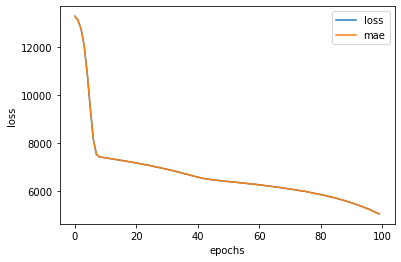

In [125]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [126]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

Text(0.5, 0, 'epochs')

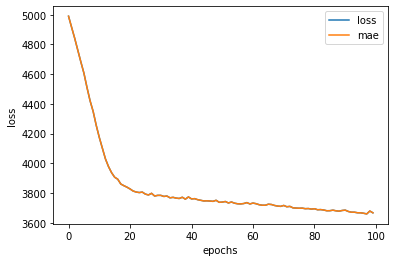

In [127]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [128]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 500us/step - loss: 3493.5271 - mae: 3493.5271


(3493.527099609375, 3493.527099609375)

In [129]:
history_3 = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [130]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 500us/step - loss: 3209.7046 - mae: 3209.7046


(3209.70458984375, 3209.70458984375)